In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

In [2]:
df = pd.read_csv('C:\\Users\\Fz\\PyReadFiles\\bank.csv', sep=";")

In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [5]:
#Method One: assigning 0 when single and 1 when married
def replmar(val):
    if val == 'single':
        return 0
    else:
        return 1

df['marital'] = df['marital'].apply(replmar, 1)

In [6]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,1,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,1,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,0,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,1,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,1,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [7]:
#Method Two:also changing the values of housing from no/yes to 0 or 1
df['housing'] = df['housing'].map({'no':0,'yes':1}.get)

In [8]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,1,primary,no,1787,0,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,1,secondary,no,4789,1,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,0,tertiary,no,1350,1,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,1,tertiary,no,1476,1,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,1,secondary,no,0,1,no,unknown,5,may,226,1,-1,0,unknown,no


In [9]:
#Method Three: changing the value of loans from no/yes to 0 or 1 
df['loan'] = df['loan'].replace({
    'no':0,
    'yes':1
})


In [10]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,1,primary,no,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,1,secondary,no,4789,1,1,cellular,11,may,220,1,339,4,failure,no
2,35,management,0,tertiary,no,1350,1,0,cellular,16,apr,185,1,330,1,failure,no
3,30,management,1,tertiary,no,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,1,secondary,no,0,1,0,unknown,5,may,226,1,-1,0,unknown,no


In [11]:
df['job'].unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [12]:
#just like the previous replace method but with the use of inplace 
df['job'].replace({
    'unknown': np.nan,
    'management':0,
    'technician':1,
    'entrepreneur':2,
    'blue-collar':3,
    'retired':4,
    'admin':5,
    'services':6,
    'self-employed':7,
    'unemployed':8,
    'housemaid':9,
    'student':10
}, inplace = True)

In [13]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,8,1,primary,no,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,no
1,33,6,1,secondary,no,4789,1,1,cellular,11,may,220,1,339,4,failure,no
2,35,0,0,tertiary,no,1350,1,0,cellular,16,apr,185,1,330,1,failure,no
3,30,0,1,tertiary,no,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,no
4,59,3,1,secondary,no,0,1,0,unknown,5,may,226,1,-1,0,unknown,no


In [14]:
df['education'].unique()

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

In [15]:
df['education'].replace({
    'unknown':np.nan,
    'tertiary':0,
    'secondary':1,
    'primary':2
    
}, inplace = True)

In [16]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,8,1,2.0,no,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,no
1,33,6,1,1.0,no,4789,1,1,cellular,11,may,220,1,339,4,failure,no
2,35,0,0,0.0,no,1350,1,0,cellular,16,apr,185,1,330,1,failure,no
3,30,0,1,0.0,no,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,no
4,59,3,1,1.0,no,0,1,0,unknown,5,may,226,1,-1,0,unknown,no


In [17]:
df['default'].replace({
    'no':0,
    'yes':1
}, inplace=True)

In [18]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,8,1,2.0,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,no
1,33,6,1,1.0,0,4789,1,1,cellular,11,may,220,1,339,4,failure,no
2,35,0,0,0.0,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,no
3,30,0,1,0.0,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,no
4,59,3,1,1.0,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,no


In [19]:
df['balance'].min()

-3313

In [20]:
df['balance'].max()

71188

### Normalizing 
__For the below function__, they used lambda, but i decided to try using functions

In [21]:
#df['balance'] = df['balance'].apply(lambda x : (x - df['balance'].min()) /(df['balance'].max() - df['balance'].min()))
def run(y):
    return ((y - df['balance'].min())/(df['balance'].max() - df['balance'].min()))
df['balance'] = df['balance'].apply(run, 1)

In [22]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,8,1,2.0,0,0.068455,0,0,cellular,19,oct,79,1,-1,0,unknown,no
1,33,6,1,1.0,0,0.108750,1,1,cellular,11,may,220,1,339,4,failure,no
2,35,0,0,0.0,0,0.062590,1,0,cellular,16,apr,185,1,330,1,failure,no
3,30,0,1,0.0,0,0.064281,1,1,unknown,3,jun,199,4,-1,0,unknown,no
4,59,3,1,1.0,0,0.044469,1,0,unknown,5,may,226,1,-1,0,unknown,no


In [23]:
df['contact'].replace({
    'unknown':np.nan,
    'telephone':0,
    'cellular':1
}, inplace  = True)

In [24]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,8,1,2.0,0,0.068455,0,0,1.0,19,oct,79,1,-1,0,unknown,no
1,33,6,1,1.0,0,0.108750,1,1,1.0,11,may,220,1,339,4,failure,no
2,35,0,0,0.0,0,0.062590,1,0,1.0,16,apr,185,1,330,1,failure,no
3,30,0,1,0.0,0,0.064281,1,1,NaN,3,jun,199,4,-1,0,unknown,no
4,59,3,1,1.0,0,0.044469,1,0,NaN,5,may,226,1,-1,0,unknown,no


In [25]:
df.contact.unique()

array([ 1., nan,  0.])

In [26]:
df.month.unique()

array(['oct', 'may', 'apr', 'jun', 'feb', 'aug', 'jan', 'jul', 'nov',
       'sep', 'mar', 'dec'], dtype=object)

In [27]:
df['month'] = df['month'].map({
    'oct':10, 'may':5, 'apr':4, 'jun':6, 'feb':2, 'aug':8, 'jan':1, 'jul':7, 'nov':11, 'sep':9, 'mar':3, 'dec':12
})

In [28]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,8,1,2.0,0,0.068455,0,0,1.0,19,10,79,1,-1,0,unknown,no
1,33,6,1,1.0,0,0.108750,1,1,1.0,11,5,220,1,339,4,failure,no
2,35,0,0,0.0,0,0.062590,1,0,1.0,16,4,185,1,330,1,failure,no
3,30,0,1,0.0,0,0.064281,1,1,NaN,3,6,199,4,-1,0,unknown,no
4,59,3,1,1.0,0,0.044469,1,0,NaN,5,5,226,1,-1,0,unknown,no


In [29]:
df.poutcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [30]:
df['poutcome'].replace({
    'unknown':np.nan,
    'failure':0,
    'other':1,
    'success':2
}, inplace = True)

In [31]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,8,1,2.0,0,0.068455,0,0,1.0,19,10,79,1,-1,0,NaN,no
1,33,6,1,1.0,0,0.108750,1,1,1.0,11,5,220,1,339,4,0.0,no
2,35,0,0,0.0,0,0.062590,1,0,1.0,16,4,185,1,330,1,0.0,no
3,30,0,1,0.0,0,0.064281,1,1,NaN,3,6,199,4,-1,0,NaN,no
4,59,3,1,1.0,0,0.044469,1,0,NaN,5,5,226,1,-1,0,NaN,no


In [32]:
#using the same normalizing formula we used for housing on pdays
df['pdays'] = df['pdays'].apply(lambda u: (u - df['pdays'].min())/(df['pdays'].max() - df['pdays'].min()))

In [33]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,8,1,2.0,0,0.068455,0,0,1.0,19,10,79,1,0.000000,0,NaN,no
1,33,6,1,1.0,0,0.108750,1,1,1.0,11,5,220,1,0.389908,4,0.0,no
2,35,0,0,0.0,0,0.062590,1,0,1.0,16,4,185,1,0.379587,1,0.0,no
3,30,0,1,0.0,0,0.064281,1,1,NaN,3,6,199,4,0.000000,0,NaN,no
4,59,3,1,1.0,0,0.044469,1,0,NaN,5,5,226,1,0.000000,0,NaN,no


In [34]:
#inplace does not go with map, either use map alone or inplace with replace
df['y'].replace({ 'no':0, 'yes':1}, inplace = True)


In [35]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,8,1,2.0,0,0.068455,0,0,1.0,19,10,79,1,0.000000,0,NaN,0
1,33,6,1,1.0,0,0.108750,1,1,1.0,11,5,220,1,0.389908,4,0.0,0
2,35,0,0,0.0,0,0.062590,1,0,1.0,16,4,185,1,0.379587,1,0.0,0
3,30,0,1,0.0,0,0.064281,1,1,NaN,3,6,199,4,0.000000,0,NaN,0
4,59,3,1,1.0,0,0.044469,1,0,NaN,5,5,226,1,0.000000,0,NaN,0


In [36]:
#to confirm our column y has been converted correctly
df.y.unique()

array([0, 1], dtype=int64)

In [37]:
#normalizing the duration again
df['duration'] = df['duration'].apply(lambda w: (w - df['duration'].min())/ (df['duration'].max() - df['duration'].min()))

In [38]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,8,1,2.0,0,0.068455,0,0,1.0,19,10,0.024826,1,0.000000,0,NaN,0
1,33,6,1,1.0,0,0.108750,1,1,1.0,11,5,0.071500,1,0.389908,4,0.0,0
2,35,0,0,0.0,0,0.062590,1,0,1.0,16,4,0.059914,1,0.379587,1,0.0,0
3,30,0,1,0.0,0,0.064281,1,1,NaN,3,6,0.064548,4,0.000000,0,NaN,0
4,59,3,1,1.0,0,0.044469,1,0,NaN,5,5,0.073486,1,0.000000,0,NaN,0


In [39]:
df.describe()

,age,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4521.000000,4334.000000,4521.000000,4521.000000,4521.000000,4521.000000,3197.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,816.000000,4521.000000
mean,41.170095,0.735457,0.844947,0.016810,0.063565,0.566025,0.152842,0.905849,15.915284,6.166777,0.086051,2.793630,0.046751,0.542579,0.557598,0.115240
std,10.576211,0.441138,0.666325,0.128575,0.040397,0.495676,0.359875,0.292084,8.247667,2.378380,0.086017,3.109807,0.114818,1.693562,0.750699,0.319347
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,0.000000,0.000000,0.000000,0.045395,0.000000,0.000000,1.000000,9.000000,5.000000,0.033102,1.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,1.000000,1.000000,0.000000,0.050429,1.000000,0.000000,1.000000,16.000000,6.000000,0.059914,2.000000,0.000000,0.000000,0.000000,0.000000
75%,49.000000,1.000000,1.000000,0.000000,0.064335,1.000000,0.000000,1.000000,21.000000,8.000000,0.107580,3.000000,0.000000,0.000000,1.000000,0.000000
max,87.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,12.000000,1.000000,50.000000,1.000000,25.000000,2.000000,1.000000


In [40]:
#as seen in the above there are 4521 entries, but there are cases where we have less entries, those are the columns
#we replaced unknown with "not a number"(np.nan)

In [41]:
df.to_csv('C:\\Users\\Fz\\PyReadFiles\\bank-preprocessed.csv', index = False)

In [42]:
ndf = pd.read_csv('C:\\Users\\Fz\\PyReadFiles\\bank-preprocessed.csv')

In [43]:
ndf

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,8,1,2.0,0,0.068455,0,0,1.0,19,10,0.024826,1,0.000000,0,NaN,0
1,33,6,1,1.0,0,0.108750,1,1,1.0,11,5,0.071500,1,0.389908,4,0.0,0
2,35,0,0,0.0,0,0.062590,1,0,1.0,16,4,0.059914,1,0.379587,1,0.0,0
3,30,0,1,0.0,0,0.064281,1,1,NaN,3,6,0.064548,4,0.000000,0,NaN,0
4,59,3,1,1.0,0,0.044469,1,0,NaN,5,5,0.073486,1,0.000000,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,6,1,1.0,0,0.039999,1,0,1.0,30,7,0.107580,5,0.000000,0,NaN,0
4517,57,7,1,0.0,1,0.000000,1,1,NaN,9,5,0.049321,1,0.000000,0,NaN,0
4518,57,1,1,1.0,0,0.048429,0,0,1.0,19,8,0.048659,11,0.000000,0,NaN,0
4519,28,3,1,1.0,0,0.059731,0,0,1.0,6,2,0.041377,4,0.243119,3,1.0,0


### Correlation

In [44]:
#to find the correlation between the attribute and the final respose
#note that the correlation between every column and itself is 1

In [45]:
ndf.corr()

,age,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,0.410768,0.190484,-0.017885,0.083820,-0.193888,-0.011250,-0.204200,-0.017853,0.073764,-0.002367,-0.005148,-0.008894,-0.003511,0.048548,0.045092
marital,0.410768,1.000000,0.169967,-0.007391,-0.007525,0.041449,0.048496,-0.056938,-0.006769,0.061882,-0.024560,0.008093,-0.020693,-0.035558,-0.009813,-0.045815
education,0.190484,0.169967,1.000000,0.011623,-0.056585,0.072716,0.024752,-0.117748,-0.017107,-0.083234,0.011193,-0.009714,-0.011531,-0.030396,-0.023715,-0.055368
default,-0.017885,-0.007391,0.011623,1.000000,-0.070886,0.006881,0.063994,0.023372,-0.013261,0.008917,-0.011615,-0.012348,-0.026317,-0.026656,0.025369,0.001303
balance,0.083820,-0.007525,-0.056585,-0.070886,1.000000,-0.050227,-0.071349,-0.036326,-0.008677,0.099872,-0.015950,-0.009976,0.009437,0.026196,0.020393,0.017905
housing,-0.193888,0.041449,0.072716,0.006881,-0.050227,1.000000,0.018451,0.046484,-0.031291,-0.170922,0.015740,-0.003574,0.116893,0.038621,-0.253137,-0.104683
loan,-0.011250,0.048496,0.024752,0.063994,-0.071349,0.018451,1.000000,0.007166,-0.004879,0.039226,-0.004997,0.017120,-0.031086,-0.022115,-0.096067,-0.070517
contact,-0.204200,-0.056938,-0.117748,0.023372,-0.036326,0.046484,0.007166,1.000000,-0.055509,0.014321,0.027292,-0.033973,0.024204,0.001642,-0.037807,-0.002108
day,-0.017853,-0.006769,-0.017107,-0.013261,-0.008677,-0.031291,-0.004879,-0.055509,1.000000,0.080436,-0.024629,0.160706,-0.094352,-0.059114,0.019975,-0.011244
month,0.073764,0.061882,-0.083234,0.008917,0.099872,-0.170922,0.039226,0.014321,0.080436,1.000000,-0.000282,0.059214,-0.112003,-0.037410,0.080557,0.023335


__A negative value__ means a negative correlation between the two columns(i.e. if one is high, the other is low or vice versa), e.g. the housing and balance have 
a negatve correlation of -0.050227. 
__A zero correlation__ means there is no influence or relation between the two attributes

In [46]:
#the poutcome has a high corr value with the final response (y), 0.396350, duration also,0.401118

In [47]:
ndf.shape[1]

17

In [48]:
#21:12
import matplotlib.pyplot as plt
%matplotlib inline

<function matplotlib.pyplot.show(close=None, block=None)>

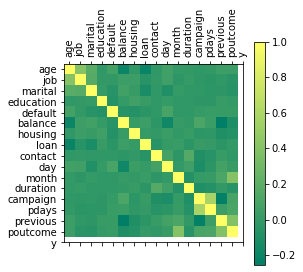

In [49]:
plt.matshow(ndf.corr(), cmap = 'summer')
plt.colorbar()

plt.xticks(list(range(len(ndf.columns))), ndf.columns, rotation = 'vertical')
plt.yticks(list(range(len(ndf.columns))), ndf.columns, rotation = 'horizontal')

plt.show

In [50]:
#note that y is the response or outcome
ndf.corr()['y'].sort_values(ascending=False)



y            1.000000
duration     0.401118
poutcome     0.396350
previous     0.116714
pdays        0.104087
age          0.045092
month        0.023335
balance      0.017905
default      0.001303
contact     -0.002108
day         -0.011244
marital     -0.045815
education   -0.055368
campaign    -0.061147
loan        -0.070517
housing     -0.104683
Name: y, dtype: float64

([<matplotlib.axis.XTick at 0xda36310>,
 [Text(0, 0, 'age'),
  Text(1, 0, 'job'),
  Text(2, 0, 'marital'),
  Text(3, 0, 'education'),
  Text(4, 0, 'default'),
  Text(5, 0, 'balance'),
  Text(6, 0, 'housing'),
  Text(7, 0, 'loan'),
  Text(8, 0, 'contact'),
  Text(9, 0, 'day'),
  Text(10, 0, 'month'),
  Text(11, 0, 'duration'),
  Text(12, 0, 'campaign'),
  Text(13, 0, 'pdays'),
  Text(14, 0, 'previous'),
  Text(15, 0, 'poutcome'),
  Text(16, 0, 'y')])

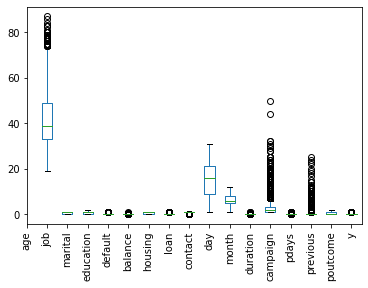

In [51]:
ndf.plot.box()
plt.xticks(list(range(len(ndf.columns))), ndf.columns, rotation='vertical')

#plt.show()

__Plottiing the age values of the 4521 entries__

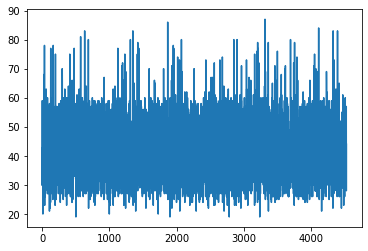

In [52]:
plt.plot(ndf.age.values)

(array([ 111.,  944., 1235.,  869.,  612.,  576.,  100.,   36.,   30.,
           8.]),
 array([19. , 25.8, 32.6, 39.4, 46.2, 53. , 59.8, 66.6, 73.4, 80.2, 87. ]),
 <BarContainer object of 10 artists>)

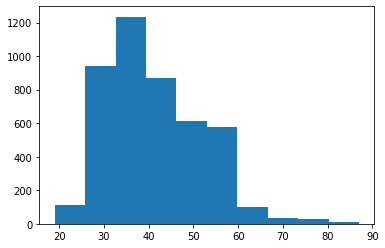

In [53]:
#to visualizee clearly to know the ages with the highest frequencies, we use histogram

plt.hist(ndf['age'].values)

In [54]:
#so it is obvious we have approx 1200, people at the ages between 30 and 40, actually from around 27 to 58, 
#but the std says around 31 to 51

### pandas  has ogt its plotting library
so the scatter matrix is being imported from the __pd__ 

<ipython-input-58-4ee125cdfb41>:3: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  plt.tight_layout()


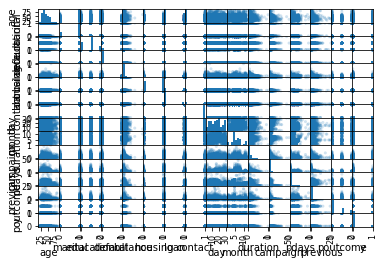

In [58]:
#using scatter matrix
ax = pd.plotting.scatter_matrix(ndf, alpha=0.2)
plt.tight_layout()
plt.show()

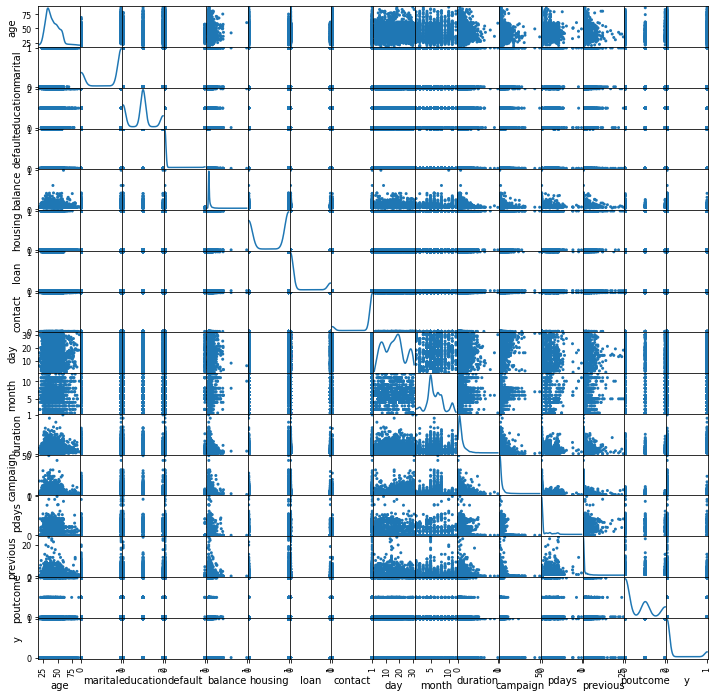

In [61]:
#its too small so we introduce figsize to scale it,  alpha is for transparency, we can use 0.2 for more transparency 
#but i just tried 1
pd.plotting.scatter_matrix(ndf, alpha=1, figsize=(12, 12), diagonal='kde')
plt.show()

In [62]:
ndf['day'].unique()

array([19, 11, 16,  3,  5, 23, 14,  6, 17, 20, 13, 30, 29, 27,  7, 18, 12,
       21, 26, 22,  2,  4, 15,  8, 28,  9,  1, 10, 31, 25, 24],
      dtype=int64)

<AxesSubplot:>

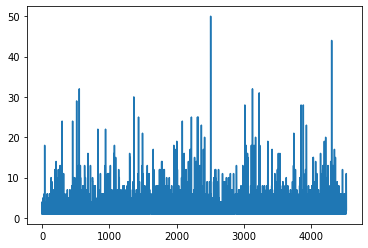

In [65]:
ndf['campaign'].plot()

<AxesSubplot:>

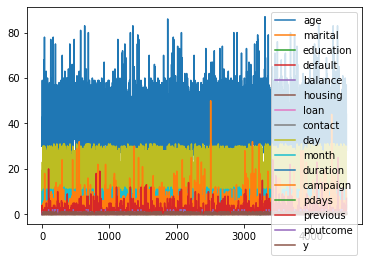

In [73]:
#plotting the whole dataframe
ndf.plot()

In [74]:
#to get rid of the outliers
#to get the first and last 1%, we will use quantile

In [77]:
low=0.01
high=0.99

ndf.quantile([low, high])

,age,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0.01,24.0,0.0,0.0,0.0,0.035457,0.0,0.0,0.0,2.0,1.0,0.002052,1.0,0.000000,0.0,0.0,0.0
0.99,72.0,1.0,2.0,1.0,0.234998,1.0,1.0,1.0,31.0,11.0,0.415425,16.0,0.425459,8.0,2.0,1.0


In [78]:
qdf = ndf.quantile([low, high])

In [12]:
#fine = ['Deji', 'shola', 'bola']
#tall = 'easy'


#for i in fine:
    #Senior Managementprint("{} said {} is the first man".format(i, tall))

In [13]:
10%4

2

In [27]:
range(1,10)

range(1, 10)

In [79]:
qdf.age

0.01    24.0
0.99    72.0
Name: age, dtype: float64

In [83]:
qdf.age[low]

24.0

In [94]:
#we use the values to eliminate the outliers using the apply method on dataframe
ndf['age'] = ndf['age'].apply(lambda g: g if qdf.age[low]< g < qdf.age[high] else np.nan)

In [95]:
ndf.describe()

,age,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4406.000000,4521.000000,4334.000000,4521.000000,4521.000000,4521.000000,4521.000000,3197.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,816.000000,4521.000000
mean,41.057876,0.735457,0.844947,0.016810,0.063565,0.566025,0.152842,0.905849,15.915284,6.166777,0.086051,2.793630,0.046751,0.542579,0.557598,0.115240
std,9.751862,0.441138,0.666325,0.128575,0.040397,0.495676,0.359875,0.292084,8.247667,2.378380,0.086017,3.109807,0.114818,1.693562,0.750699,0.319347
min,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,0.000000,0.000000,0.000000,0.045395,0.000000,0.000000,1.000000,9.000000,5.000000,0.033102,1.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,1.000000,1.000000,0.000000,0.050429,1.000000,0.000000,1.000000,16.000000,6.000000,0.059914,2.000000,0.000000,0.000000,0.000000,0.000000
75%,48.000000,1.000000,1.000000,0.000000,0.064335,1.000000,0.000000,1.000000,21.000000,8.000000,0.107580,3.000000,0.000000,0.000000,1.000000,0.000000
max,71.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,12.000000,1.000000,50.000000,1.000000,25.000000,2.000000,1.000000


In [90]:
#we could have also been more rigorous by eliminating lower and higher 10%, instead of 1%
#the entries having nan will not be listed when using describe even if still present so we have to drop them

In [91]:
ndf.age.dropna(inplace=True)

In [92]:
ndf.describe()

,age,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4406.000000,4521.000000,4334.000000,4521.000000,4521.000000,4521.000000,4521.000000,3197.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,816.000000,4521.000000
mean,41.057876,0.735457,0.844947,0.016810,0.063565,0.566025,0.152842,0.905849,15.915284,6.166777,0.086051,2.793630,0.046751,0.542579,0.557598,0.115240
std,9.751862,0.441138,0.666325,0.128575,0.040397,0.495676,0.359875,0.292084,8.247667,2.378380,0.086017,3.109807,0.114818,1.693562,0.750699,0.319347
min,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,0.000000,0.000000,0.000000,0.045395,0.000000,0.000000,1.000000,9.000000,5.000000,0.033102,1.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,1.000000,1.000000,0.000000,0.050429,1.000000,0.000000,1.000000,16.000000,6.000000,0.059914,2.000000,0.000000,0.000000,0.000000,0.000000
75%,48.000000,1.000000,1.000000,0.000000,0.064335,1.000000,0.000000,1.000000,21.000000,8.000000,0.107580,3.000000,0.000000,0.000000,1.000000,0.000000
max,71.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,12.000000,1.000000,50.000000,1.000000,25.000000,2.000000,1.000000


In [93]:
ndf.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30.0,8,1,2.0,0,0.068455,0,0,1.0,19,10,0.024826,1,0.000000,0,NaN,0
1,33.0,6,1,1.0,0,0.108750,1,1,1.0,11,5,0.071500,1,0.389908,4,0.0,0
2,35.0,0,0,0.0,0,0.062590,1,0,1.0,16,4,0.059914,1,0.379587,1,0.0,0
3,30.0,0,1,0.0,0,0.064281,1,1,NaN,3,6,0.064548,4,0.000000,0,NaN,0
4,59.0,3,1,1.0,0,0.044469,1,0,NaN,5,5,0.073486,1,0.000000,0,NaN,0


In [104]:
#plt.boxplot(ndf.age)

<AxesSubplot:title={'center':'Box plots of ages'}>

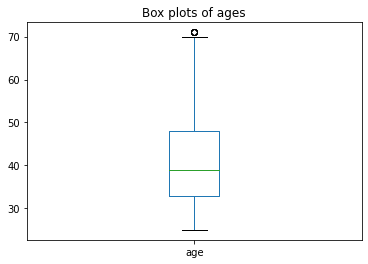

In [105]:
ndf.age.plot.box(title='Box plots of ages')

In [106]:
#this shows how to get rid of outliers using pandas and matplotlib

In [107]:
#lets work on the covariance that is similar to correlation

In [110]:
ndf.cov()

,age,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,95.098806,1.710818,1.183271,-0.015047,0.030235,-0.844954,0.009882,-0.455416,-1.633041,1.708845,-0.016781,-0.083784,-0.022474,-0.335006,0.187671,0.051717
marital,1.710818,0.194603,0.050009,-0.000419,-0.000134,0.009063,0.007699,-0.007486,-0.024628,0.064926,-0.000932,0.011102,-0.001048,-0.026565,-0.003355,-0.006454
education,1.183271,0.050009,0.443989,0.000997,-0.001524,0.023981,0.006013,-0.022508,-0.093661,-0.131709,0.000643,-0.020258,-0.000881,-0.034476,-0.011456,-0.011808
default,-0.015047,-0.000419,0.000997,0.016532,-0.000368,0.000439,0.002961,0.000847,-0.014062,0.002727,-0.000128,-0.004937,-0.000389,-0.005804,0.001487,0.000053
balance,0.030235,-0.000134,-0.001524,-0.000368,0.001632,-0.001006,-0.001037,-0.000438,-0.002891,0.009596,-0.000055,-0.001253,0.000044,0.001792,0.000618,0.000231
housing,-0.844954,0.009063,0.023981,0.000439,-0.001006,0.245695,0.003291,0.006790,-0.127923,-0.201501,0.000671,-0.005509,0.006653,0.032420,-0.091682,-0.016571
loan,0.009882,0.007699,0.006013,0.002961,-0.001037,0.003291,0.129510,0.000756,-0.014483,0.033575,-0.000155,0.019160,-0.001284,-0.013478,-0.023561,-0.008104
contact,-0.455416,-0.007486,-0.022508,0.000847,-0.000438,0.006790,0.000756,0.085313,-0.131600,0.011419,0.000671,-0.030056,0.000918,0.000938,-0.008153,-0.000216
day,-1.633041,-0.024628,-0.093661,-0.014062,-0.002891,-0.127923,-0.014483,-0.131600,68.024016,1.577849,-0.017473,4.121894,-0.089349,-0.825706,0.117800,-0.029616
month,1.708845,0.064926,-0.131709,0.002727,0.009596,-0.201501,0.033575,0.011419,1.577849,5.656692,-0.000058,0.437965,-0.030586,-0.150687,0.187474,0.017723


In [112]:
#The covariance is another way of seeing how correlated the data are with each other 
#we are still only interested with the covariance of the response and every other output in the data

In [113]:
ndf.to_csv('C:\\Users\\Fz\\PyReadFiles\\bank-preprocessed.csv', index=False)

In [125]:
ndf1 = pd.read_csv('C:\\Users\\Fz\\PyReadFiles\\bank-preprocessed.csv')

In [127]:
ndf1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [129]:
#from pandas.plotting import andrews_curves
#andrews_curves(ndf1, 'y')
#plt.show()


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

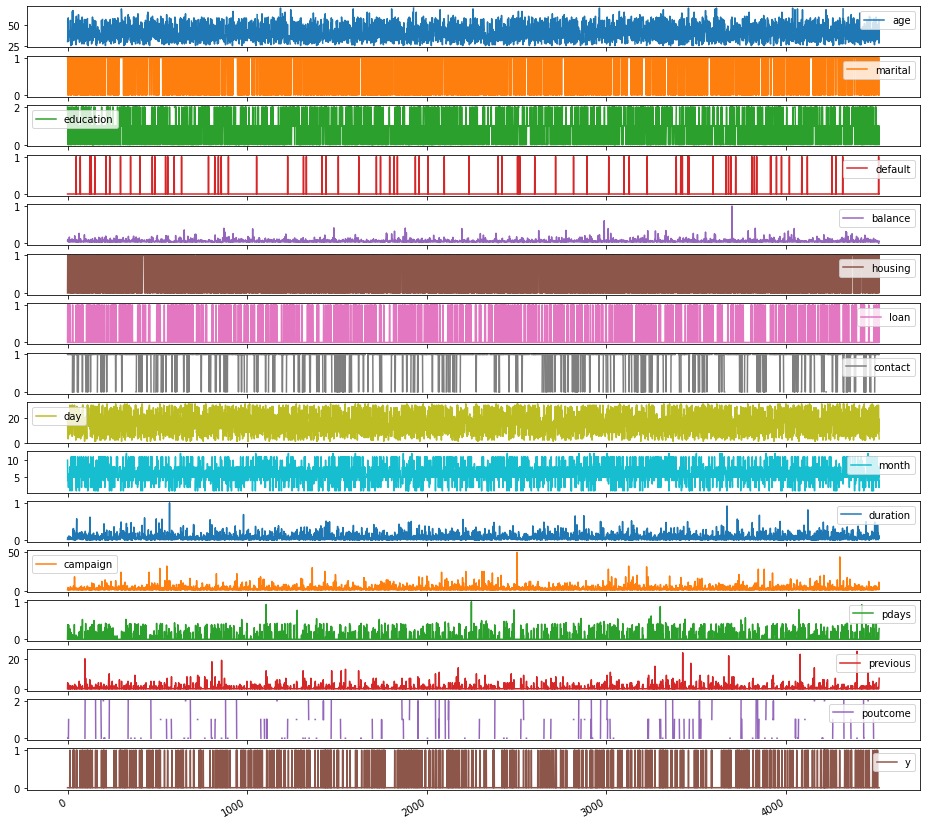

In [134]:
ndf1.plot(subplots=True, figsize=(16, 16))

<AxesSubplot:>

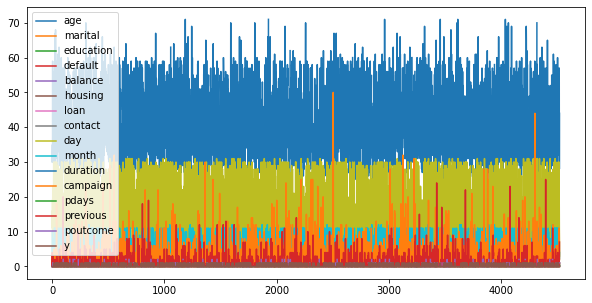

In [137]:
#so its visible that what the subplot does is it doesn't combine all the plots for each column
ndf1.plot(figsize=(10, 5))

In [149]:
#pd.plotting.parallel_coordinates(ndf1, 'y', colormap='winter')


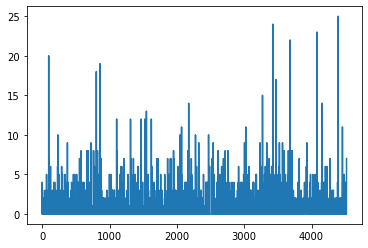

In [153]:
plt.plot(ndf1.previous.values)

(array([4.184e+03, 1.910e+02, 9.400e+01, 2.800e+01, 1.200e+01, 3.000e+00,
        2.000e+00, 2.000e+00, 2.000e+00, 3.000e+00]),
 array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5, 25. ]),
 <BarContainer object of 10 artists>)

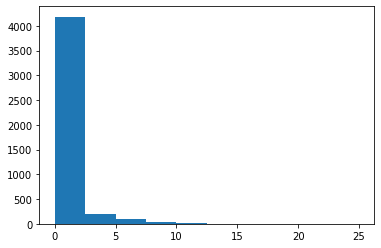

In [154]:
plt.hist(ndf1.previous.values)

array([<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
      dtype=object)

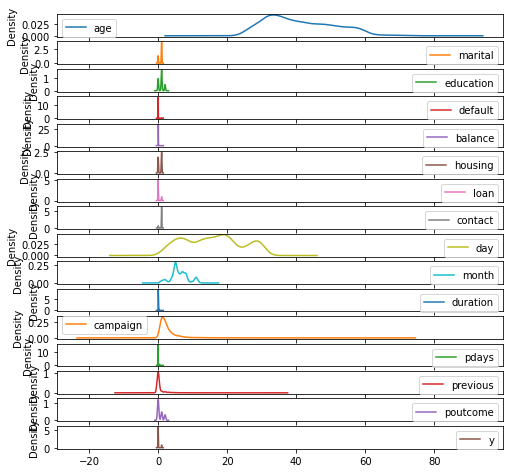

In [157]:
#kde show 
ndf1.plot.kde(subplots=True, figsize=(8, 8))